In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler

In [4]:
df = pd.read_csv('../data/data_t1.csv')
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={"label": "Missing Data"})

<Axes: ylabel='children'>

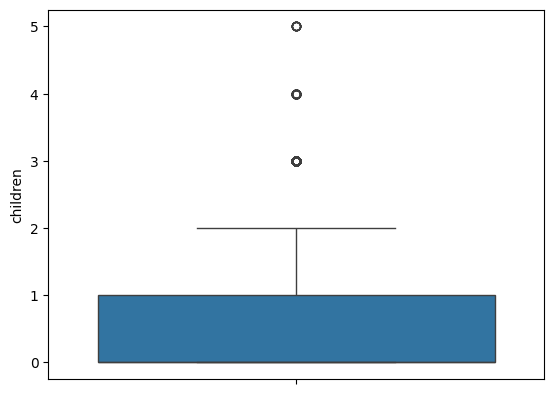

In [10]:
sns.boxplot(df['children'])

In [9]:
outlier_children = df['children'] == 20
df['children'] = df['children'].mask(outlier_children, 2)
df['children'] = abs(df['children'])

<Axes: ylabel='days_employed'>

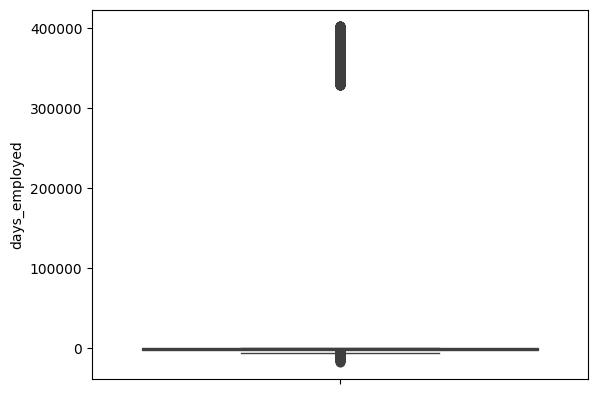

In [11]:
sns.boxplot(df['days_employed'])

In [12]:
len((df.loc[(df['days_employed'] < 0) | (df['days_employed'] > 200000)])) / len(df)

0.8990011614401858

In [13]:
# giá trị tuyệt đối
df['days_employed'] = abs(df['days_employed'])

# Làm tròn
df['days_employed'] = round(df['days_employed'], 0)

# kiểm tra phân phối dữ liệu
df['days_employed'].describe()

count     19351.000000
mean      66914.727973
std      139030.879631
min          24.000000
25%         927.000000
50%        2194.000000
75%        5538.000000
max      401755.000000
Name: days_employed, dtype: float64

<Axes: ylabel='days_employed'>

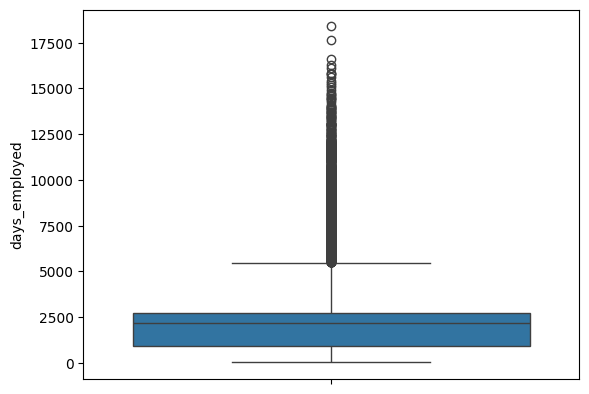

In [14]:
# Thay thế giá trị mean bằng median
outlier_de = (df['days_employed'] > 200000) & (df['days_employed'].notnull())
df['days_employed'] = df['days_employed'].mask(outlier_de, df['days_employed'].median())

sns.boxplot(df['days_employed'])

### Xử lý trùng lặp dữ liệu

In [ ]:
df.duplicated().sum()

np.int64(54)

In [18]:
df = df.drop_duplicates().reset_index(drop=True)

In [19]:
df.duplicated().sum()

np.int64(0)

## Chuyển đổi dữ liệu

In [5]:
games_df = pd.read_csv('../data/games.csv')
games_df[games_df['Platform'] == '2600']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN
240,Pitfall!,2600,1981.0,Platform,4.21,0.24,0.0,0.05,NaN,NaN,NaN
262,Asteroids,2600,1980.0,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8741,Klax,2600,1989.0,Puzzle,0.14,0.01,0.0,0.00,NaN,NaN,NaN
9095,Krull,2600,1982.0,Action,0.13,0.01,0.0,0.00,NaN,NaN,NaN
9487,RealSports Volleyball,2600,1981.0,Sports,0.12,0.01,0.0,0.00,NaN,NaN,NaN
11747,Super Football,2600,1987.0,Sports,0.07,0.00,0.0,0.00,NaN,NaN,NaN


In [ ]:
# games_df['User_Score'] = games_df['User_Score'].replace('tbd', np.nan)
# outlier_us = (games_df['User_Score'].apply(lambda x: not isinstance(x, str)) | (games_df['User_Score'].astype(float) <= 0))

# games_df['User_Score'] = games_df['User_Score'].mask(outlier_us, games_df['User_Score'].median())
# games_df['User_Score']

In [49]:
top2_ref_df = games_df.groupby(['Platform', 'Name'])[['NA_sales', 'Critic_Score', 'User_Score']].sum(
).query('Platform == "PS3" & Critic_Score > 0 ').reset_index()
top2_ref_df = top2_ref_df[['Platform', 'Name', 'NA_sales', 'Critic_Score', 'User_Score']]
top2_ref_df

,Platform,Name,NA_sales,Critic_Score,User_Score
0,PS3,Tales of Xillia 2,0.20,71.0,7.9
1,PS3,007: Quantum of Solace,0.43,65.0,6.6
2,PS3,2010 FIFA World Cup South Africa,0.30,82.0,7.8
3,PS3,2014 FIFA World Cup Brazil,0.15,73.0,4.3
4,PS3,3D Dot Game Heroes,0.36,77.0,8
...,...,...,...,...,...
813,PS3,de Blob 2,0.11,74.0,7.1
814,PS3,inFAMOUS,1.76,85.0,8.3
815,PS3,inFAMOUS 2,1.05,83.0,8.4
816,PS3,nail'd,0.08,66.0,6.2


In [51]:
agg_selected_region_platform = pd.pivot_table(games_df, index='Platform', values=['NA_sales', 'EU_sales', 'JP_sales'], aggfunc='sum').sort_values('JP_sales')
agg_selected_region_platform

,EU_sales,JP_sales,NA_sales
Platform,,,
2600,5.47,0.00,90.60
PCFX,0.00,0.03,0.00
GG,0.00,0.04,0.00
3DO,0.00,0.10,0.00
TG16,0.00,0.16,0.00
PC,142.44,0.17,94.53
XOne,51.59,0.34,93.12
SCD,0.36,0.45,1.00
XB,60.95,1.38,186.69


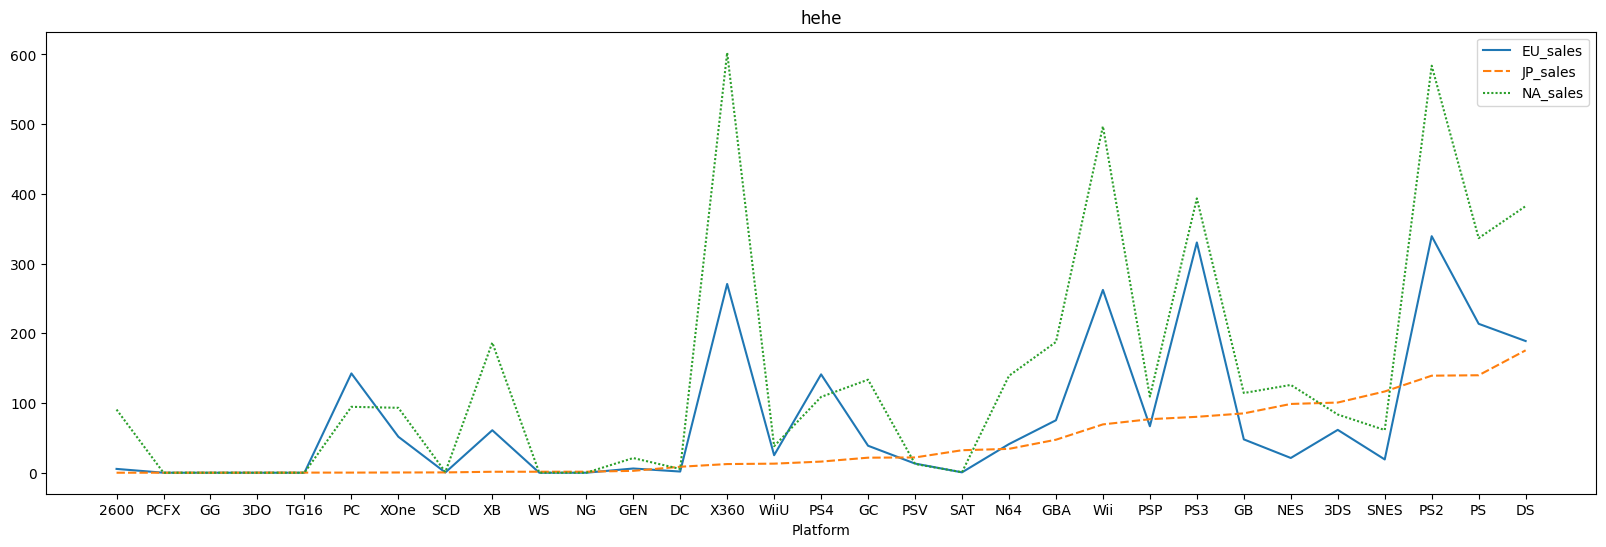

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('hehe')
sns.lineplot(agg_selected_region_platform)
plt.show()

# Kỹ thuật xây dựng đặc trưng: Tỷ lệ hóa, Chuẩn hóa và Tiêu chuẩn hóa.

### Tỷ lệ hóa Feature

In [6]:
insurance_us_df = pd.read_csv('../data/insurance_us.csv')
insurance_us_df

,gender,age,salary,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [5]:
feature_names = ['gender', 'age', 'family_members', 'salary']
transformer_mas = MaxAbsScaler().fit(insurance_us_df[feature_names].to_numpy())
df_scaled = insurance_us_df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(insurance_us_df[feature_names].to_numpy())
df_scaled

,gender,age,salary,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


### Chuẩn hóa

In [77]:
### Chuẩn hóa đặc trưng - normalization
std = MinMaxScaler().fit(insurance_us_df)
x_train_std = std.transform(insurance_us_df)
x_train_std

array([[1.        , 0.4893617 , 0.60108548, 0.16666667, 0.        ],
       [0.        , 0.59574468, 0.44369064, 0.16666667, 0.2       ],
       [0.        , 0.23404255, 0.21302578, 0.        , 0.        ],
       ...,
       [0.        , 0.04255319, 0.3880597 , 0.33333333, 0.        ],
       [1.        , 0.08510638, 0.37177748, 0.5       , 0.        ],
       [1.        , 0.21276596, 0.47896879, 0.16666667, 0.        ]],
      shape=(5000, 5))

# Tiêu chuẩn hóa: Standardization

In [10]:
scaler = StandardScaler()

dt_standard = scaler.fit_transform(insurance_us_df)
dt_standard = pd.DataFrame(dt_standard, columns=insurance_us_df.columns)
dt_standard

,gender,age,salary,family_members,insurance_benefits
0,1.002002,1.190432,0.978235,-0.177957,-0.319560
1,-0.998002,1.782851,-0.193589,-0.177957,1.839628
2,-0.998002,-0.231375,-1.910918,-1.094314,-0.319560
3,-0.998002,-1.179247,0.180182,0.738401,-0.319560
4,1.002002,-0.349859,-1.395720,-1.094314,-0.319560
...,...,...,...,...,...
4995,-0.998002,-0.349859,-0.425934,0.738401,-0.319560
4996,-0.998002,0.361044,1.261089,-0.177957,-0.319560
4997,-0.998002,-1.297731,-0.607769,0.738401,-0.319560
4998,1.002002,-1.060763,-0.728992,1.654758,-0.319560
